In [1]:
!which python

/Users/megatron/Desktop/base/play/bin/python


In [1]:
!which python

/Users/megatron/Desktop/base/play/bin/python


In [2]:
!ls

anthropic.sh   gemini.sh      mydojo         play           Untitled.ipynb
fastai         gpu_mode       notes          pocketflow


In [3]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq  --use-deprecated=legacy-resolver fastai ddgs


In [4]:
!pip install -Uqq  --use-deprecated=legacy-resolver fastai ddgs

In [5]:
!which pip

/Users/megatron/Desktop/base/play/bin/pip


In [6]:
from ddgs import DDGS #DuckDuckGo has changed the api so we need to update 
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

In [7]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('phineas and ferb photos', max_images=1)
urls[0]

'https://wallpapers.com/images/hd/phineas-and-ferb-surfing-p7ip3ho14l228qc0.jpg'

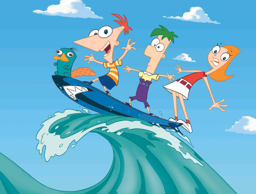

In [8]:
from fastdownload import download_url
dest = 'phineas_and_ferb.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

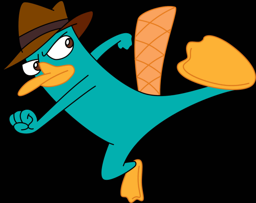

In [15]:
download_url(search_images('agent p perry photos', max_images=1)[0], 'perry.jpg', show_progress=False)
Image.open('perry.jpg').to_thumb(256,256)

In [17]:
from fastai.vision.all import *

In [12]:
searches = 'tom and jerry','phineas and ferb','anime'
path = Path('multi_class_test')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo', max_images=400))
    time.sleep(5)
    resize_images(path/o, max_size=400, dest=path/o)

In [13]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

2

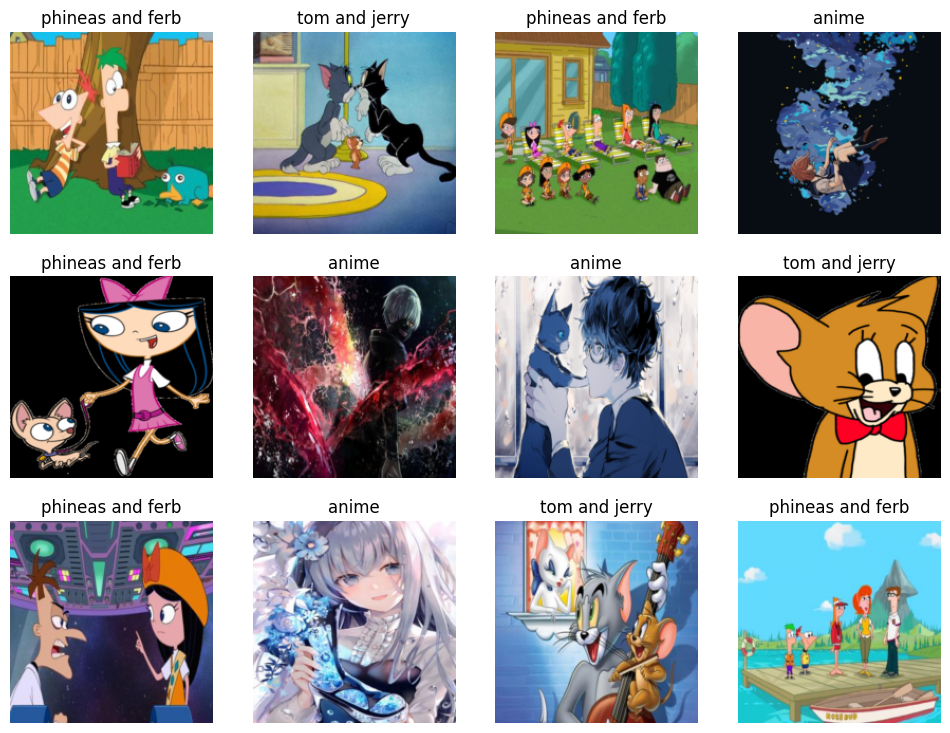

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [22]:
new_learn = vision_learner(dls, resnet18, metrics=error_rate, wd=0.001)
new_learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.562643,0.647300,0.296296,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.505816,0.141067,0.055556,00:01
1,0.368637,0.086408,0.037037,00:01
2,0.258575,0.079532,0.037037,00:01
3,0.189223,0.085150,0.037037,00:01
4,0.145139,0.090162,0.037037,00:01


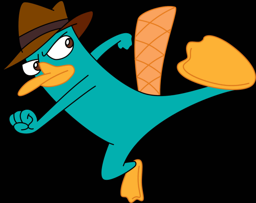

In [23]:
download_url(search_images('agent p perry photos', max_images=1)[0], 'perry.jpg', show_progress=False)
Image.open('perry.jpg').to_thumb(256,256)

In [24]:
new_learn.predict(PILImage.create('perry.jpg'))

('phineas and ferb', tensor(1), tensor([1.3988e-04, 9.9898e-01, 8.8440e-04]))

In [25]:
interp = ClassificationInterpretation.from_learner(new_learn)

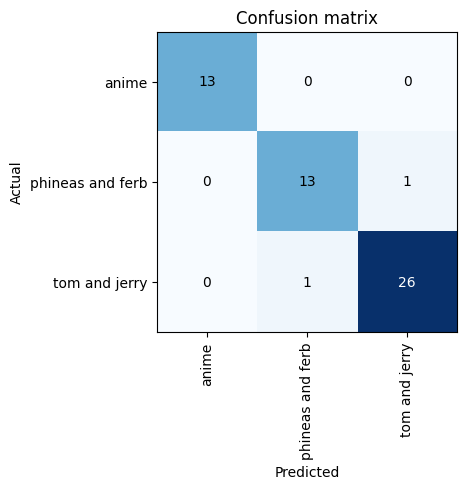

In [26]:
interp.plot_confusion_matrix()

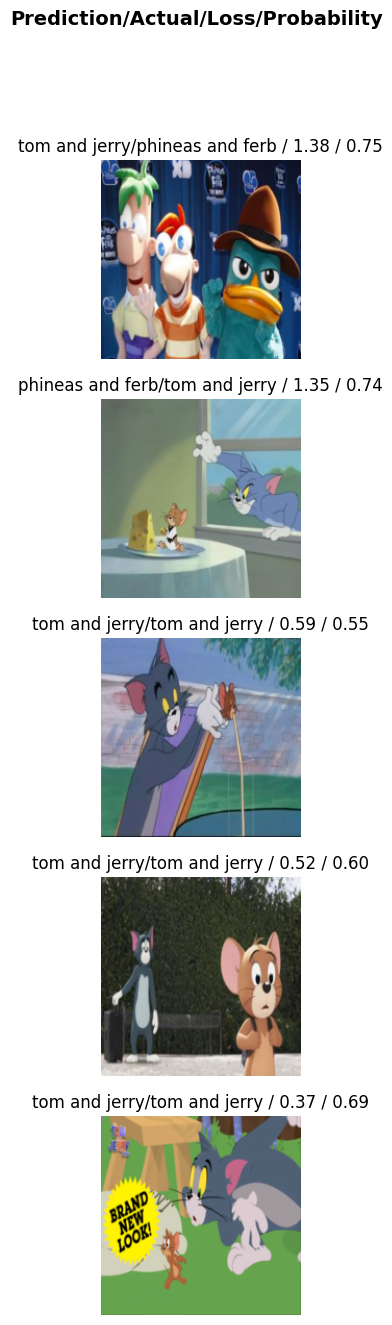

In [30]:
interp.plot_top_losses(5, nrows=5)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


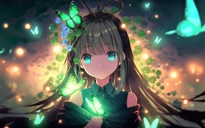

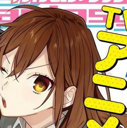

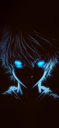

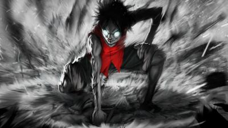

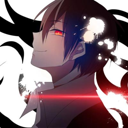

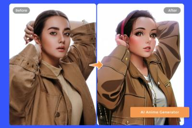

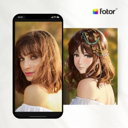

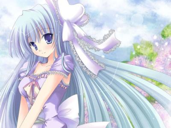

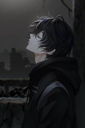

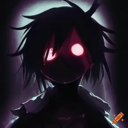

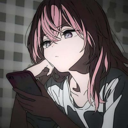

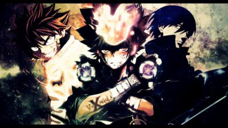

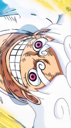

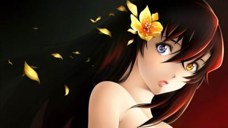

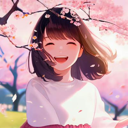

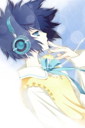

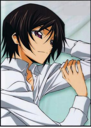

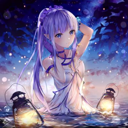

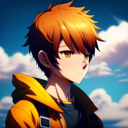

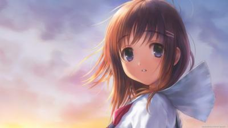

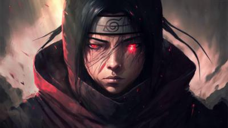

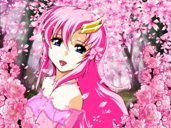

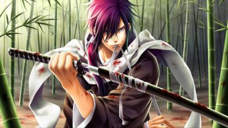

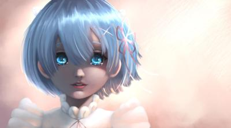

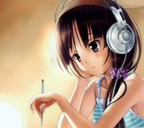

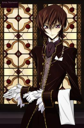

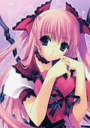

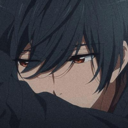

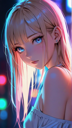

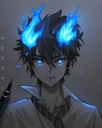

In [35]:
!pip install ipywidgets
from fastai.vision.widgets import *
cleaner = ImageClassifierCleaner(new_learn)

In [48]:
cleaner

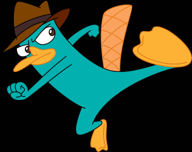

In [39]:
im = PILImage.create('perry.jpg')
im.thumbnail((192, 192))
im

In [41]:
def error_rate2(*args, **kwargs):
    print(*args)
    print(**kwargs)
    return error_rate(*args, **kwargs)

In [49]:
new_learn.export('test.pkl')

In [47]:
learn = load_learner('/Users/megatron/Downloads/cartoon.pkl')
learn.predict(PILImage.create('perry.jpg'))

/Users/megatron/Desktop/base/play/lib/python3.13/site-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


TypeError: unsupported operand type(s) for +: 'PILImage' and 'dict'